## Importing Libraries

In [2]:
# !pip install syllables
!pip install textstat
!pip install itertools
!pip install collections
!pip install wordcloud

ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools
ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [3]:
import pandas as pd
import numpy as np
import syllables
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import tokenize,ngrams
from nltk.corpus import stopwords
import re
import textstat
import itertools
import collections
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

## About the data

In [4]:
reviews_df = pd.read_csv("P:\Python sem2\IMDB\imdb_final_data.csv")

In [5]:
reviews_df.head()

Index Movie Name Review_Date                Author  Rating  \
0      0        RRR   22-Aug-22          evanston_dad    10.0   
1      1        RRR   16-Sep-22                iquine     9.0   
2      2        RRR   19-Aug-22  matthewssilverhammer    10.0   
3      3        RRR   17-Sep-22        JeanDeMichaque     9.0   
4      4        RRR   29-Jun-22        owenpont-70803    10.0   

                                        Review_Title  \
0         Have Never Seen Anything Quite Like This\n   
1   Rambo Meshed with Crouching Tiger + Musical.....   
2         I wish I could've seen this in a theater\n   
3                              Weirdly spectacular\n   
4                                      Wow........\n   

                                              Review  \
0  I have seen a lot of movies in my time, made i...   
1  I bet you'd never think the mash-up the heavy-...   
2  There is officially ZERO reason to watch Gray ...   
3  When I pushed play, I did not really believe t...   
4  This was an incredible film. I never heard of ...   

                       Review_Url  
0  /review/rw8909682/?ref_=tt_urv  
1  /review/rw8909682/?ref_=tt_urv  
2  /review/rw8909682/?ref_=tt_urv  
3  /review/rw8909682/?ref_=tt_urv  
4  /review/rw8909682/?ref_=tt_urv

### Making a copy of dataframe for data pre processing

In [6]:
reviews_df_copy = reviews_df

In [7]:
reviews_df_copy.head()

Index Movie Name Review_Date                Author  Rating  \
0      0        RRR   22-Aug-22          evanston_dad    10.0   
1      1        RRR   16-Sep-22                iquine     9.0   
2      2        RRR   19-Aug-22  matthewssilverhammer    10.0   
3      3        RRR   17-Sep-22        JeanDeMichaque     9.0   
4      4        RRR   29-Jun-22        owenpont-70803    10.0   

                                        Review_Title  \
0         Have Never Seen Anything Quite Like This\n   
1   Rambo Meshed with Crouching Tiger + Musical.....   
2         I wish I could've seen this in a theater\n   
3                              Weirdly spectacular\n   
4                                      Wow........\n   

                                              Review  \
0  I have seen a lot of movies in my time, made i...   
1  I bet you'd never think the mash-up the heavy-...   
2  There is officially ZERO reason to watch Gray ...   
3  When I pushed play, I did not really believe t...   
4  This was an incredible film. I never heard of ...   

                       Review_Url  
0  /review/rw8909682/?ref_=tt_urv  
1  /review/rw8909682/?ref_=tt_urv  
2  /review/rw8909682/?ref_=tt_urv  
3  /review/rw8909682/?ref_=tt_urv  
4  /review/rw8909682/?ref_=tt_urv

### Data Pre-Processing

In [8]:
reviews_df_copy.drop(['Unamed: 0'], axis = 1)

Movie Name Review_Date                Author  Rating  \
0                RRR   22-Aug-22          evanston_dad    10.0   
1                RRR   16-Sep-22                iquine     9.0   
2                RRR   19-Aug-22  matthewssilverhammer    10.0   
3                RRR   17-Sep-22        JeanDeMichaque     9.0   
4                RRR   29-Jun-22        owenpont-70803    10.0   
..               ...         ...                   ...     ...   
895  Captain America   05-Jan-99                Squonk     2.0   
896  Captain America   14-Mar-10             johnc2141     7.0   
897  Captain America   17-Feb-06              sethn172    10.0   
898  Captain America   02-Dec-01        Skeletors_Hood     6.0   
899  Captain America   01-May-99             Tin Man-5    10.0   

                                          Review_Title  \
0           Have Never Seen Anything Quite Like This\n   
1     Rambo Meshed with Crouching Tiger + Musical.....   
2           I wish I could've seen this in a theater\n   
3                                Weirdly spectacular\n   
4                                        Wow........\n   
..                                                 ...   
895                               Comic fans beware.\n   
896                                          not bad\n   
897                  This Captain Will Save America!\n   
898   Could have been much worse; luckily, no Lundg...   
899          Best film variation of a superhero yet!\n   

                                                Review  \
0    I have seen a lot of movies in my time, made i...   
1    I bet you'd never think the mash-up the heavy-...   
2    There is officially ZERO reason to watch Gray ...   
3    When I pushed play, I did not really believe t...   
4    This was an incredible film. I never heard of ...   
..                                                 ...   
895  I've never read a Captain America comic book. ...   
896  i know many will disagree with me but i though...   
897  Yes! Another superhero film comes and goes! Wh...   
898  Let me start by saying that I am not a die har...   
899  Many critics have panned this film, and I thin...   

                         Review_Url  
0    /review/rw8909682/?ref_=tt_urv  
1    /review/rw8909682/?ref_=tt_urv  
2    /review/rw8909682/?ref_=tt_urv  
3    /review/rw8909682/?ref_=tt_urv  
4    /review/rw8909682/?ref_=tt_urv  
..                              ...  
895  /review/rw0305714/?ref_=tt_urv  
896  /review/rw0305714/?ref_=tt_urv  
897  /review/rw0305714/?ref_=tt_urv  
898  /review/rw0305714/?ref_=tt_urv  
899  /review/rw0305714/?ref_=tt_urv  

[900 rows x 7 columns]

In [9]:
reviews_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Index         900 non-null    int64  
 1   Movie Name    900 non-null    object 
 2   Review_Date   900 non-null    object 
 3   Author        900 non-null    object 
 4   Rating        847 non-null    float64
 5   Review_Title  900 non-null    object 
 6   Review        900 non-null    object 
 7   Review_Url    900 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 56.4+ KB


In [10]:
reviews_df_copy.describe()['Rating']

count    847.000000
mean       6.840614
std        3.621495
min        1.000000
25%        3.000000
50%        9.000000
75%       10.000000
max       10.000000
Name: Rating, dtype: float64

In [11]:
reviews_df_copy.isnull().sum()

Index            0
Movie Name       0
Review_Date      0
Author           0
Rating          53
Review_Title     0
Review           0
Review_Url       0
dtype: int64

In [12]:
movies_group = reviews_df_copy.groupby("Movie Name")["Rating"].count()
movies_group

Movie Name
365 Days: This Day                               25
Aladdin                                          23
Baaghi 3                                         25
Birdemic: Shock and Terror                       24
BloodRayne                                       23
Captain America                                  22
Daniel the Wizard                                25
Forrest Gump                                     67
From Justin to Kelly                             25
Glitter                                          22
Interstellar                                     94
John Wick: Chapter 4                             25
Manos: The Hands of Fate                         22
Pathaan                                          49
RRR                                              74
Race 3                                           24
Spider-Man: Into the Spider-Verse                73
The Dark Knight                                  48
The Lord of the Rings: The Return of the King    69
T

### Checking null values

In [13]:
movie_null_counts = reviews_df_copy.groupby('Movie Name')['Rating'].apply(lambda x: x.isnull().sum())
print(movie_null_counts)

Movie Name
365 Days: This Day                                0
Aladdin                                           2
Baaghi 3                                          0
Birdemic: Shock and Terror                        1
BloodRayne                                        2
Captain America                                   3
Daniel the Wizard                                 0
Forrest Gump                                      8
From Justin to Kelly                              0
Glitter                                           3
Interstellar                                      6
John Wick: Chapter 4                              0
Manos: The Hands of Fate                          3
Pathaan                                           1
RRR                                               1
Race 3                                            1
Spider-Man: Into the Spider-Verse                 2
The Dark Knight                                   2
The Lord of the Rings: The Return of the King     6
T

In [14]:
avg_ratings = reviews_df_copy.groupby('Movie Name')['Rating'].mean()
avg_ratings

Movie Name
365 Days: This Day                               1.760000
Aladdin                                          8.652174
Baaghi 3                                         1.120000
Birdemic: Shock and Terror                       2.083333
BloodRayne                                       4.217391
Captain America                                  5.863636
Daniel the Wizard                                1.240000
Forrest Gump                                     8.537313
From Justin to Kelly                             1.360000
Glitter                                          4.500000
Interstellar                                     8.808511
John Wick: Chapter 4                             8.600000
Manos: The Hands of Fate                         2.181818
Pathaan                                          5.306122
RRR                                              6.837838
Race 3                                           1.166667
Spider-Man: Into the Spider-Verse                8.753425
The

### Replacing the null values by average value

In [15]:
def replace_null_ratings(row, avg_ratings):
    if pd.isnull(row['Rating']):
        return avg_ratings[row['Movie Name']]
    else:
        return row['Rating']

reviews_df_copy['Rating'] = reviews_df_copy.apply(replace_null_ratings, args=(avg_ratings,), axis=1)

In [16]:
reviews_df_copy.head()

Index Movie Name Review_Date                Author  Rating  \
0      0        RRR   22-Aug-22          evanston_dad    10.0   
1      1        RRR   16-Sep-22                iquine     9.0   
2      2        RRR   19-Aug-22  matthewssilverhammer    10.0   
3      3        RRR   17-Sep-22        JeanDeMichaque     9.0   
4      4        RRR   29-Jun-22        owenpont-70803    10.0   

                                        Review_Title  \
0         Have Never Seen Anything Quite Like This\n   
1   Rambo Meshed with Crouching Tiger + Musical.....   
2         I wish I could've seen this in a theater\n   
3                              Weirdly spectacular\n   
4                                      Wow........\n   

                                              Review  \
0  I have seen a lot of movies in my time, made i...   
1  I bet you'd never think the mash-up the heavy-...   
2  There is officially ZERO reason to watch Gray ...   
3  When I pushed play, I did not really believe t...   
4  This was an incredible film. I never heard of ...   

                       Review_Url  
0  /review/rw8909682/?ref_=tt_urv  
1  /review/rw8909682/?ref_=tt_urv  
2  /review/rw8909682/?ref_=tt_urv  
3  /review/rw8909682/?ref_=tt_urv  
4  /review/rw8909682/?ref_=tt_urv

In [17]:
reviews_df_copy.isnull().sum()

Index           0
Movie Name      0
Review_Date     0
Author          0
Rating          0
Review_Title    0
Review          0
Review_Url      0
dtype: int64

## Text Processing
Applying the below string cleaning steps : 
1. Remove non-alphanumerics
2. Remove URLs
3. Remove line breaks
4. Replace more than one whitespace with a single space

In [18]:
def clean_text(a):
    a_replaced = re.sub('[^A-Za-z0-9]+', ' ', a)
    a_replaced = re.sub(r'w+:/{2}[dw-]+(.[dw-]+)*(?:(?:/[^s/]*))*', '', a_replaced)
    a_replaced = re.sub('\n', ' ', a_replaced)
    a_replaced = re.sub(' +', ' ', a_replaced)    
    return a_replaced

#### Applying the clean_text function on Review column for Text processing

In [19]:
reviews_df_copy['cleaned_review'] = reviews_df_copy['Review'].apply(clean_text)

### Data Processing
We need to preprocess the data. This involves several steps, including:

1. Tokenization: Splitting the text into individual words
2. Stopword removal: Removing common words like "a", "an", and "the"
3. Stemming or lemmatization: Reducing words to their root form
4. Lowercasing: Converting all text to lowercase

In [20]:
stop_words = set(stopwords.words('english'))
stop_words -= {"aren't", "ain", "aren", "couldn'", "couldn't", "didn", "didn't", "doesn", "doesn't", "don't", "don'", "hadn", "hadn't", "hasn", "hasn't", "haven", "haven't", "isn", "isn't", "mightn","mightn't", "mustn", "mustn't", "needn", "needn't", "no", "nor", "not", "shan", "shan't", "shouldn", "shouldn't", "wasn", "wasn't", "weren", "weren't", "won't", "wouldn", "wouldn't"}
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    
    # Stem or lemmatize the tokens
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join the tokens back into a single string
    stemmed_text = " ".join(stemmed_tokens)
    lemmatized_text = " ".join(lemmatized_tokens)
    
    # Convert the text to lowercase
    stemmed_text = stemmed_text.lower()
    lemmatized_text = lemmatized_text.lower()
    
    return stemmed_text, lemmatized_text

w_tokenizer = tokenize.WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(clean_text(text.lower())) if w not in stopwords.words('english')]

# Apply the preprocessing function to the review text column
reviews_df_copy['stemmed_review'], reviews_df_copy['lemmatized_review'] = zip(*reviews_df_copy['cleaned_review'].apply(preprocess_text))

## Feature Engineering

### 1. Create Feature - Review_word_count
This represents the total word count across each review.

In [19]:
reviews_df_copy['Review_Words'] = reviews_df_copy['Review'].apply(lambda x : len( x.split()) )

### 2. Create Feature - Review_date_cleaned Column 
Converting the Review_Date column into a pandas datetime format.

In [20]:
reviews_df_copy['Review_Date_Cleaned'] = pd.to_datetime(reviews_df_copy['Review_Date']).dt.date

### 3. Create Feature - Syllables
Syllables are phonological “building blocks” for each word.
Creating a column to calculate the Total_Syllables for each review. 
Additionally, also calculating Average_Syllables for each review. This will be calculated as Total_Syllables/Total_Words.

In [21]:
reviews_df_copy['Total_Syllables'] = reviews_df_copy['Review'].apply(lambda x : syllables.estimate(x))
reviews_df_copy['Average_Syllables'] = reviews_df_copy['Total_Syllables']/reviews_df_copy['Review_Words']

### 4. Create Feature - Flesch Reading Ease

In [22]:
reviews_df_copy['flesch_reading_ease'] = reviews_df_copy['cleaned_review'].apply(lambda x : textstat.flesch_reading_ease(x) )
# Example of a negative readability example
a = reviews_df_copy.sort_values(by='flesch_reading_ease').head().iloc[1]
print(a['flesch_reading_ease'])
print()
print(a['cleaned_review'])

-944.88

Based on the 1986 novel by Winston Groom of the same name Forrest Gump is about a simple man named Forrest Tom Hanks whom with a low I Q who goes through life accidentally being present at many historic moments while building success for himself however never getting with his true love Jenny Curran Robin Wright which mostly seems to be the only thing that is eluding him Without spoiling the movie too much this feel good financial blockbuster was indeed one of my favorite movies from the 1990s I still quote act out rewatch this movie even with the downer tragic ending this film has I just can t help loving it despite the film changing a lot from the source material like Gump s core personality and size I kinda like that he s not an autistic savant In my opinion it would be too jarring It would be really too odd and unrealistic to see him play chess while being an astronaut while people still thinking that he s an idiot I kinda like that the film primarily focuses on the first e

### 5. Create Feature: review lemma
The entire review may contain a lot of words. Some words are more frequently used in English, like ‘the’, ‘a’, ‘of’, etc. Such words are known as stopwords and do not carry much significance in our analysis.

Each word can be converted into its root form to reduce the vocabulary size. This root word is known as a lemma. The root word produced after lemmatization has a meaning in English vocabulary.

In [21]:
reviews_df_copy['review_lemmas'] = reviews_df_copy['cleaned_review'].apply(lambda x : lemmatize_text(x))
reviews_df_copy['review_lemmas']

0      [seen, lot, movie, time, made, lot, different,...
1      [bet, never, think, mash, heavy, handed, rambo...
2      [officially, zero, reason, watch, gray, man, s...
3      [pushed, play, really, believe, would, ever, w...
4      [incredible, film, never, heard, film, netflix...
                             ...                        
895    [never, read, captain, america, comic, book, k...
896    [know, many, disagree, thought, 1990s, captain...
897    [yes, another, superhero, film, come, go, love...
898    [let, start, saying, die, hard, captain, ameri...
899    [many, critic, panned, film, think, sad, fate,...
Name: review_lemmas, Length: 900, dtype: object

### 6. Create Feature: Time Period

In [24]:
pd.to_datetime(reviews_df_copy['Review_Date']).dt.year.value_counts()

2022    116
2023     90
2018     83
2020     81
2014     57
2019     57
2021     39
2006     38
2008     33
2005     32
2015     30
2003     28
2004     27
2010     25
2007     21
2011     20
2013     18
2016     17
2009     16
2002     15
2012     13
1999     12
2017     11
2000      9
2001      8
1998      4
Name: Review_Date, dtype: int64

In [25]:
reviews_df_copy['Period'] = np.where(pd.to_datetime(reviews_df_copy['Review_Date']).dt.year>=2018,'c. Post 2018','Other')
reviews_df_copy['Period'] = np.where(pd.to_datetime(reviews_df_copy['Review_Date']).dt.year<2018,'b. Btn 2009 and 2018',reviews_df_copy['Period'])
reviews_df_copy['Period'] = np.where(pd.to_datetime(reviews_df_copy['Review_Date']).dt.year<2009,'a. During & Before 2009',reviews_df_copy['Period'])
reviews_df_copy['Period'].value_counts()

c. Post 2018               466
a. During & Before 2009    227
b. Btn 2009 and 2018       207
Name: Period, dtype: int64

Period 1: All reviews written till 2009

Period 2: All reviews written between 2009 and 2018

Period 1: All reviews are written post 2018

In [26]:
# Define a function to get the length of a review in words
def get_review_length(review):
    return len(review.split())

# Apply the function to the review text column and store the result in a new column
reviews_df_copy['review_length'] = reviews_df_copy['cleaned_review'].apply(get_review_length)

### Perform sentiment analysis
Performing sentiment analysis on the preprocessed text using TextBlob. TextBlob is a Python library for processing textual data that provides an easy-to-use interface for sentiment analysis.

In [22]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

# Apply the sentiment analysis function to the lemmatized review text column
reviews_df_copy['sentiment'] = reviews_df_copy['lemmatized_review'].apply(get_sentiment)

#### Applying the get_sentiment to the dataset and making a new column named sentiment_score

In [23]:
reviews_df_copy['sentiment_score'] = reviews_df_copy['cleaned_review'].apply(get_sentiment)

### Interpret the results

Interpreting the results of our sentiment analysis. The sentiment score ranges from -1 to 1, where -1 is very negative, 0 is neutral, and 1 is very positive. We can use this score to categorize the reviews as positive, negative, or neutral based on a threshold value.

In [24]:
def get_sentiment_category(sentiment_score, threshold=0.1):
    if sentiment_score > threshold:
        return 'positive'
    elif sentiment_score < -threshold:
        return 'negative'
    else:
        return 'neutral'

#### Applying the get_sentiment_category to the dataset and making a new column named sentiment_category

In [25]:
# Add a new column to map the sentiment score to a sentiment category
reviews_df_copy['sentiment_category'] = reviews_df_copy['sentiment_score'].apply(get_sentiment_category)

## EDA

### 1. EDA: Rating
The rating trend

0
mean        6.9
median      9.0
count     900.0
Name: Rating, dtype: float64


<AxesSubplot:ylabel='index'>

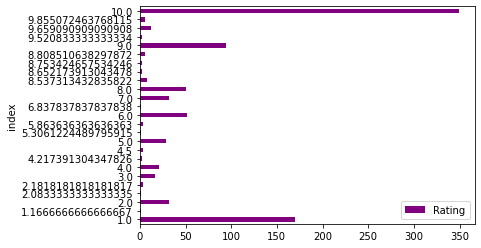

In [26]:
print(reviews_df_copy['Rating'].isnull().sum())
print(reviews_df_copy['Rating'].agg(['mean','median','count']).round(2))
reviews_df_copy['Rating'].value_counts().reset_index().sort_values(by='index').plot.barh(x='index', y='Rating', color="purple")

#### How is the rating span across the Time Period

In [27]:
reviews_df_copy.groupby('Period')['Rating'].agg(['min','mean','median','max','count']).round(2)

min  mean  median   max  count
Period                                                 
a. During & Before 2009  1.0  6.74    8.65  10.0    227
b. Btn 2009 and 2018     1.0  6.96    9.00  10.0    207
c. Post 2018             1.0  6.94    9.00  10.0    466

The mean value, we can see that the mean rating was lower in 2009; it increased between 2009 and 2018. However, post-2018, the mean rating decreased minutely. This means that the people who posted reviews post-2018 found the movie average and rated it above 6.

#### The days of the week the review is posted.

<AxesSubplot:ylabel='Review_Day_no'>

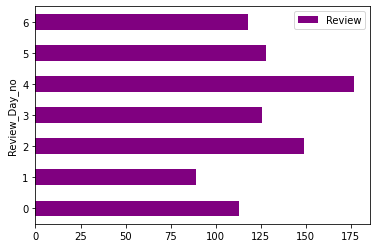

In [28]:
reviews_df_copy['Review_Day'] = pd.to_datetime(reviews_df_copy['Review_Date']).dt.day_name()
reviews_df_copy['Review_Day_no'] = pd.to_datetime(reviews_df_copy['Review_Date']).dt.dayofweek
# a = reviews_df_copy['Review_Day_no'].value_counts().reset_index().sort_values(by='index')
a = reviews_df_copy.groupby(['Review_Day_no','Review_Day']).Review.count().reset_index()
a.plot.barh(x='Review_Day_no', y='Review', color="purple")

Here, 0 represents Monday and 6 represents Sunday.

We can see that Friday is when most of the reviews are posted.
On a similar note, Tuesday is when the review count is minimal.

An interesting trend is that the review count increases across the week i.e. it was lowest on Tuesday, increased on Wednesday, and kept on increasing.

#### The Day wise trend across time.

In [29]:
reviews_df_copy.groupby('Period')['Review_Day_no'].agg(['count'])
a = reviews_df_copy.pivot_table(index='Review_Day_no',columns='Period',values='cleaned_review',aggfunc='count',margins=True)
a = (a*100).div(a.loc['All']).round(2)
a

Period         a. During & Before 2009  b. Btn 2009 and 2018  c. Post 2018  \
Review_Day_no                                                                
0                                15.86                 14.01         10.30   
1                                13.66                 11.59          7.30   
2                                15.86                 15.46         17.38   
3                                17.62                 15.94         11.37   
4                                11.01                 13.53         26.61   
5                                12.33                 14.98         14.81   
6                                13.66                 14.49         12.23   
All                             100.00                100.00        100.00   

Period            All  
Review_Day_no          
0               12.56  
1                9.89  
2               16.56  
3               14.00  
4               19.67  
5               14.22  
6               13.11  
All            100.00

1. During 2009, most of the reviews were posted on Weekdays, starting from Monday. This makes sense because back in 2009, we did not have OTT platforms, so people used to watch movies in theatres in weekends and review after that.
2. Between 2009 and 2018, people had access to TV, DVD, and home entertainment. So, we see the reviews posted across all the days.
3. Post-2018, we saw the advent of Netflix, and several other OTT players started popping up in the last 5 years. Now, people can watch a movie at the tip of their fingertips (even on a mobile device). So, the reviews are posted across all the days more evenly now.

### 2. EDA: Review_Words
#### Checking how many reviews have just a single word.

In [30]:
print(reviews_df_copy[reviews_df_copy['Review_Words']==1].shape)

(3, 18)


Three reviews are having just a single word in the reviews text.

In [31]:
reviews_df_copy[reviews_df_copy['Review_Words']==1]['cleaned_review'].iloc[0]

' r 79 '

#### Fetching word count across the time

In [32]:
reviews_df_copy.groupby('Period')['Review_Words'].agg(['min','mean','median','max','count']).round(2)

min    mean  median  max  count
Period                                                  
a. During & Before 2009    1  113.00    90.0  655    227
b. Btn 2009 and 2018       1  133.46    92.0  997    207
c. Post 2018               1   71.11    50.0  761    466

1. The median and mean values of Review_Words are decreasing over time.
2. It’s interesting to see that the mean rating decreased from ~133 to ~71, which is an approximate 38% reduction in the review length.
3. It is an indicator that people have been more succinct in recent years.

### 3. EDA: Are people using more numbers in recent times?
Creating a dataframe that stores the start of the word and calculates the relative distribution.

Creating a column named Start_Vowel using the below rules:

1. If the 1st letter belongs to the set [‘a’, ‘e’, ‘i’ ,’o’, ‘u’], we will tag it as a vowel.
2. If the 1st letter is a number, we will tag it as a number.
3. If the above 2 conditions are not satisfied, we will tag it as a consonant.

We can apply the above conditions as we have used only alphanumerics in the review_lemmas column.

In [33]:
full_start_letter_df = pd.DataFrame()
for period in sorted(reviews_df_copy['Period'].unique()):
    curr_lemmatized_tokens = list(reviews_df_copy[reviews_df_copy['Period']==period]['review_lemmas'])
    curr_token_list = list(itertools.chain(*curr_lemmatized_tokens))
    start_letter = [i[0] for i in curr_token_list]
    start_letter_df = (pd.DataFrame(start_letter)[0].value_counts(1)*100).reset_index().sort_values(by='index')
    start_letter_df[0] = start_letter_df[0]
    start_letter_df.columns = ['letter',period]
    start_letter_df['Start_Letter'] = np.where(start_letter_df['letter'].isin(['a','e','i','o','u']),'a. Vowel',
                                                  np.where(start_letter_df['letter'].isin(['0','1','2','3','4','5','6','7','8','9']),'c. Number',
                                                       'b. Consonant')
                                              )
    start_letter_df = start_letter_df.groupby('Start_Letter')[period].sum().reset_index()
    start_letter_df.columns = ['Start_Letter',period]
    start_letter_df[period] = start_letter_df[period].apply(lambda x : np.round(x,2))
    try:
        full_start_letter_df = full_start_letter_df.merge(start_letter_df)
    except:
        full_start_letter_df = start_letter_df
print(full_start_letter_df.shape)
full_start_letter_df

(3, 4)


Start_Letter  a. During & Before 2009  b. Btn 2009 and 2018  c. Post 2018
0      a. Vowel                    16.30                 16.74         16.99
1  b. Consonant                    82.28                 81.74         80.89
2     c. Number                     1.43                  1.51          2.12

Each column is represented as a percentage. 
1. In 2009 – 16.30% of the words began with the vowel.
2. Between 2009 and 2018 - 16.74% of the words began with the vowel.
3. Post 2018 - 16.99% of the words began with vowel.

We can see that the words starting with Vowels are increased.
Also, we can see that in Post 2018, reviews contain more numbers.

In [34]:
reviews_df_copy.groupby('Period')['Average_Syllables'].agg(['mean','median','count']).round(2)

mean  median  count
Period                                      
a. During & Before 2009  1.55    1.54    227
b. Btn 2009 and 2018     1.58    1.57    207
c. Post 2018             1.57    1.55    466

Insights:

If we look at the mean values across time, we see a slight increase from Period 1 to Period 2.
However, there was a slight decrease in Period 3 (1.58 to 1.57). It means that the recent reviews are using slightly simple terms.

### 5. EDA: flesch readability score

In [35]:
display(reviews_df_copy.groupby('Rating')['flesch_reading_ease'].agg(['mean','median','count']).round(2))
reviews_df_copy.groupby('Period')['flesch_reading_ease'].agg(['mean','median','count']).round(2)

mean  median  count
Rating                         
1.000000    3.67   32.91    170
1.166667    6.86    6.86      1
2.000000    7.15   28.52     32
2.083333  -12.77  -12.77      1
2.181818  -69.61  -88.90      3
3.000000  -36.77  -26.31     17
4.000000  -36.22   33.25     21
4.217391   32.07   32.07      2
4.500000  -66.90  -85.85      3
5.000000    7.45   32.57     29
5.306122  -37.13  -37.13      1
5.863636  -37.36   -8.04      3
6.000000  -21.06    9.40     52
6.837838  -31.38  -31.38      1
7.000000    8.54   21.40     32
8.000000  -18.89   17.01     51
8.537313   12.02   19.04      8
8.652174  -42.37  -42.37      2
8.753425   -2.28   -2.28      2
8.808511  -62.90  -53.37      6
9.000000  -19.14   12.78     94
9.520833   70.47   70.47      2
9.659091   -5.10    4.66     12
9.855072   -2.79   35.61      6
10.000000  -9.01   21.41    349

mean  median  count
Period                                       
a. During & Before 2009 -25.10    3.48    227
b. Btn 2009 and 2018    -48.89  -12.77    207
c. Post 2018             17.02   35.96    466

Insights:

If we look at the analysis, we see that reviews having ratings of 1 or 10 have higher flesh readability scores. This means that these reviews are easy to understand.

It makes sense when people rate the highest they talk about the positive highlights, and they rate the lowest when they express their dissatisfaction and opinion about the movie.

If we look at the mean values across time, we see a slight increase from Period 1 to Period 2.
However, there was a good increase in Period 3 (-48.89 to 17.02), Which means that the recent reviews are not slightly complicated to read and use more complex words.


### 6. EDA: Looking at the top words mentioned in the reviews

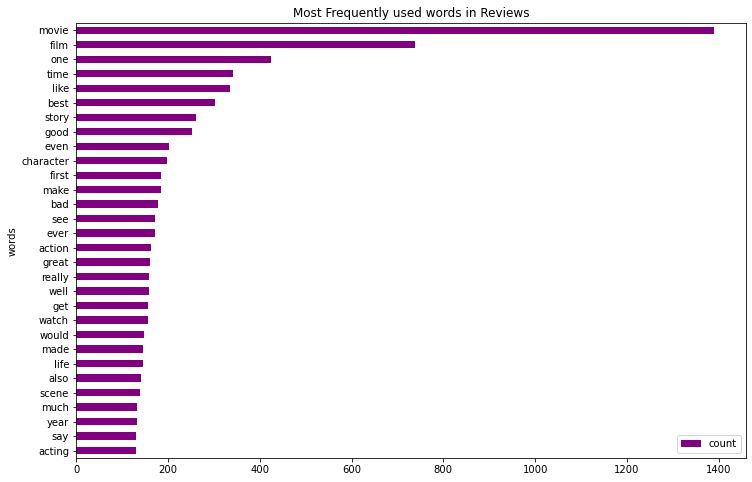

In [36]:
lemmatized_tokens = list(reviews_df_copy['review_lemmas'])
%matplotlib inline
token_list = list(itertools.chain(*lemmatized_tokens)) 
counts_no = collections.Counter(token_list) 
# counts_no = collections.Counter(ngrams(token_list, 1))
clean_reviews = pd.DataFrame(counts_no.most_common(30), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used words in Reviews") 
plt.show()
# print(lemmatized_tokens)

The most popular word is “movie”, followed by “film” and so on. This gives good insight.

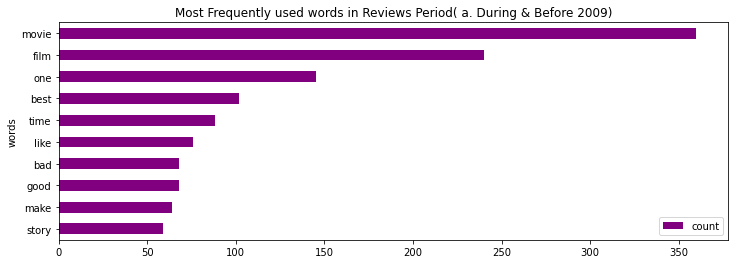

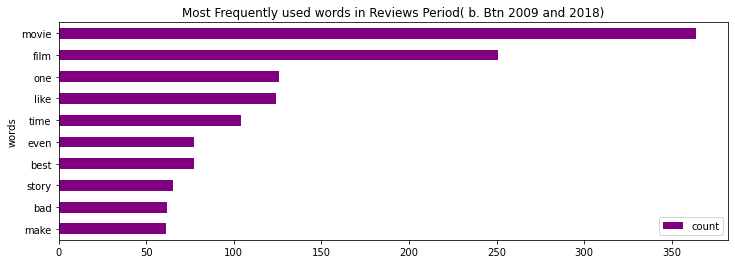

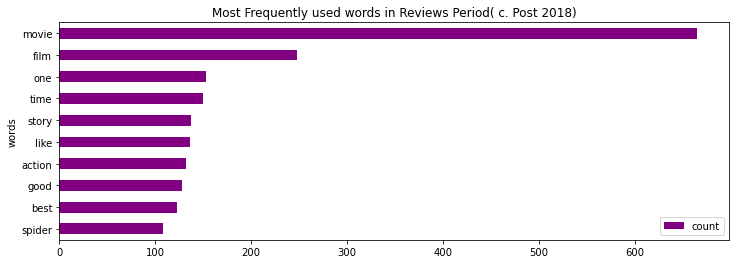

In [37]:
for period in sorted(reviews_df_copy['Period'].unique()):
    lemmatized_tokens = list(reviews_df_copy[reviews_df_copy['Period']==period]['review_lemmas'])
    token_list = list(itertools.chain(*lemmatized_tokens)) 
    counts_no = collections.Counter(token_list) 
    clean_reviews = pd.DataFrame(counts_no.most_common(10), columns=['words', 'count']) 
    fig, ax = plt.subplots(figsize=(12, 4)) 
    clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
    ax.set_title("Most Frequently used words in Reviews Period( "+str(period)+")") 
    plt.show()

We can see that most of the words like “movie”, “film”, “one”, and several other words are commonly written in the reviews.

However, we can get a better perspective if we look at 2 words. This is where n-grams come into play. The above analysis is uni-gram or 1-gram, i.e. we analyzed the frequency of each word. Similarly, we can look at bi-gram, where we analyze the frequency of 2 consecutive words. Also, we can look at tri-gram, where we analyze the frequency of 3 consecutive words. 

### 7. EDA: Looking at the top bi-grams mentioned in the reviews

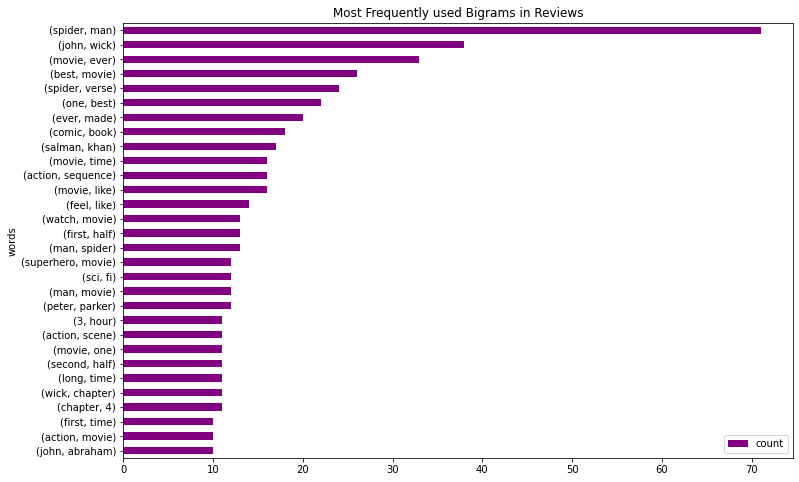

In [38]:
counts_no = collections.Counter(ngrams(token_list, 2))
clean_reviews = pd.DataFrame(counts_no.most_common(30), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used Bigrams in Reviews") 
plt.show()

Insight:

1. The most bi-grams are “spider man”, followed by “forrest gump” and so on.
2. If we analyze closely, we can look at the top 30 bi-grams also contain names of actors – “tom hank”, “robin williams” and others.
3. There is also mention of “film series”. It means that there can be prequels or sequels to this movie.
5. There is also mention of the “special effect” and “comic book”. This gives an indication that what movie is related to.

#### Top 10 bi-grams for each of the time periods.

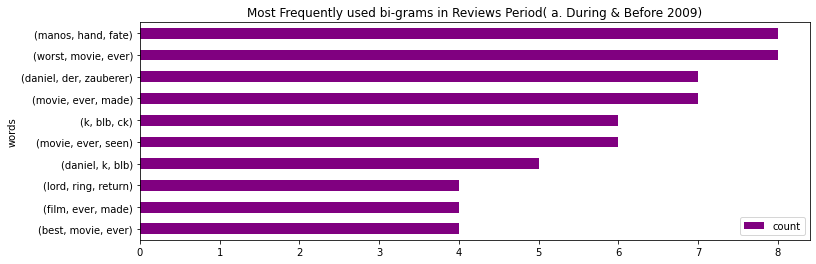

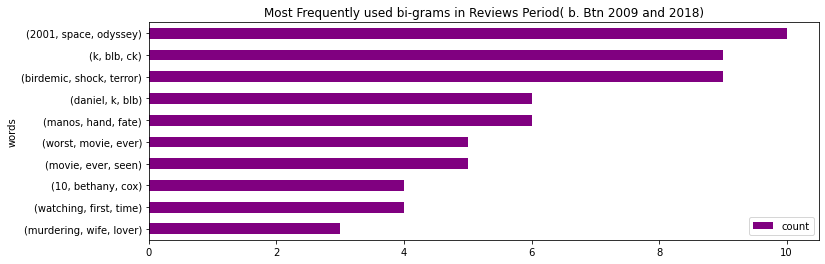

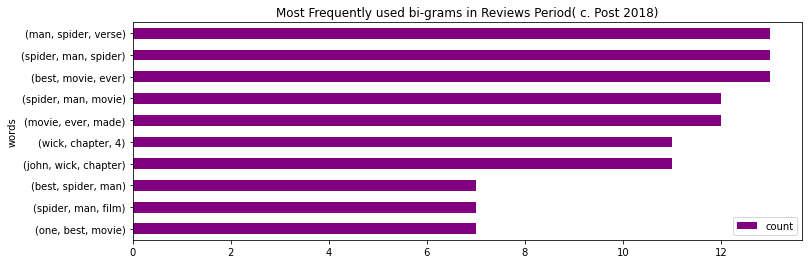

In [39]:
for period in sorted(reviews_df_copy['Period'].unique()):
    lemmatized_tokens = list(reviews_df_copy[reviews_df_copy['Period']==period]['review_lemmas'])
    token_list = list(itertools.chain(*lemmatized_tokens)) 
    counts_no = collections.Counter(ngrams(token_list, 3))
    clean_reviews = pd.DataFrame(counts_no.most_common(10), columns=['words', 'count']) 
    fig, ax = plt.subplots(figsize=(12, 4)) 
    clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
    ax.set_title("Most Frequently used bi-grams in Reviews Period( "+str(period)+")") 
    plt.show()

### 8. EDA: Looking at the top tri-grams mentioned in the reviews

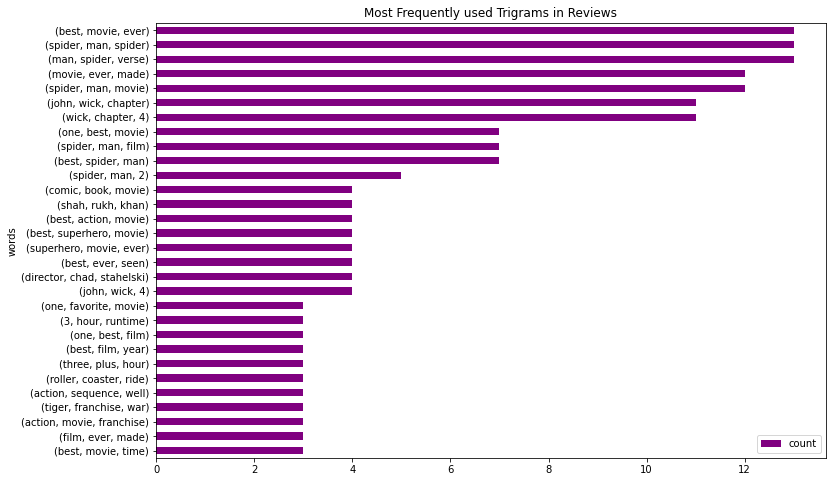

In [40]:
counts_no = collections.Counter(ngrams(token_list, 3))
clean_reviews = pd.DataFrame(counts_no.most_common(30), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used Trigrams in Reviews") 
plt.show()

We see tri-grams like “spider man film”, “john wick chapter”. 

#### Top 10 tri-grams for each time period.

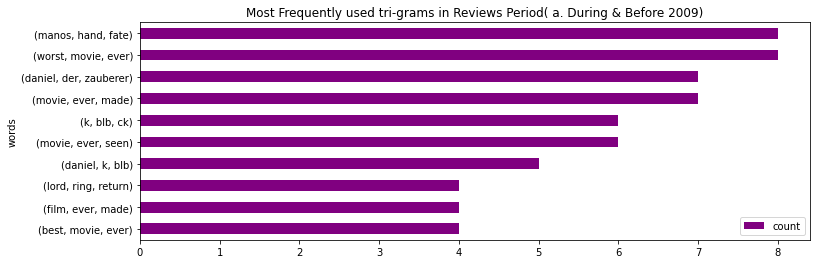

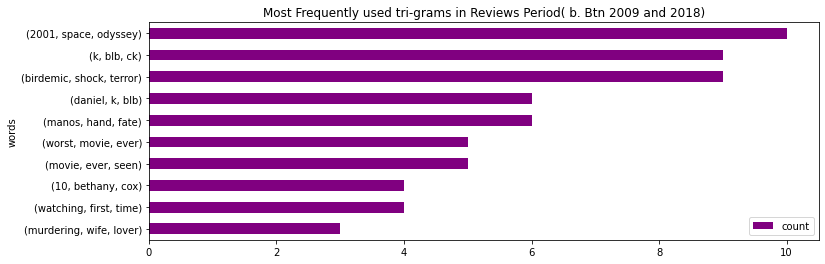

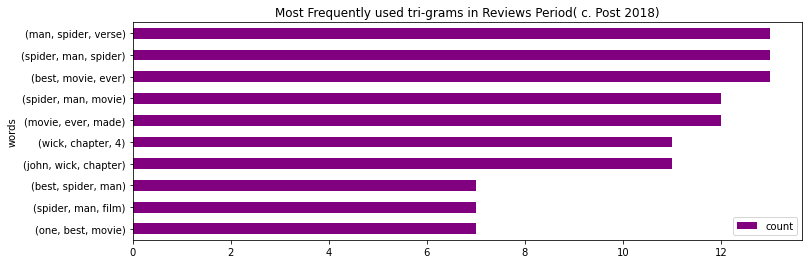

In [41]:
for period in sorted(reviews_df_copy['Period'].unique()):
    lemmatized_tokens = list(reviews_df_copy[reviews_df_copy['Period']==period]['review_lemmas'])
    token_list = list(itertools.chain(*lemmatized_tokens)) 
    counts_no = collections.Counter(ngrams(token_list, 3))
    clean_reviews = pd.DataFrame(counts_no.most_common(10), columns=['words', 'count']) 
    fig, ax = plt.subplots(figsize=(12, 4)) 
    clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
    ax.set_title("Most Frequently used tri-grams in Reviews Period( "+str(period)+")") 
    plt.show()

### 9. EDA: Wordclouds

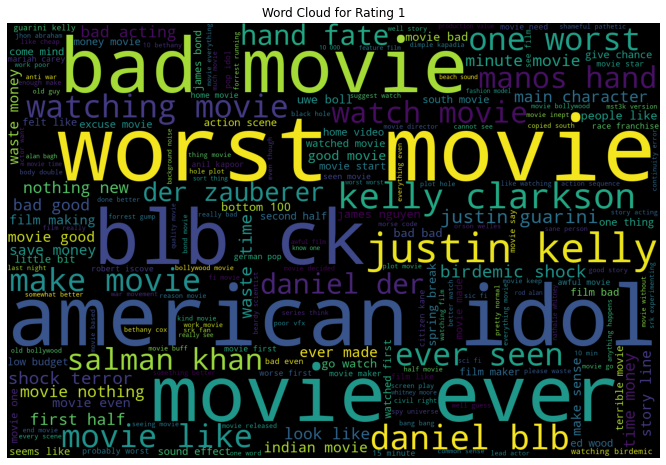

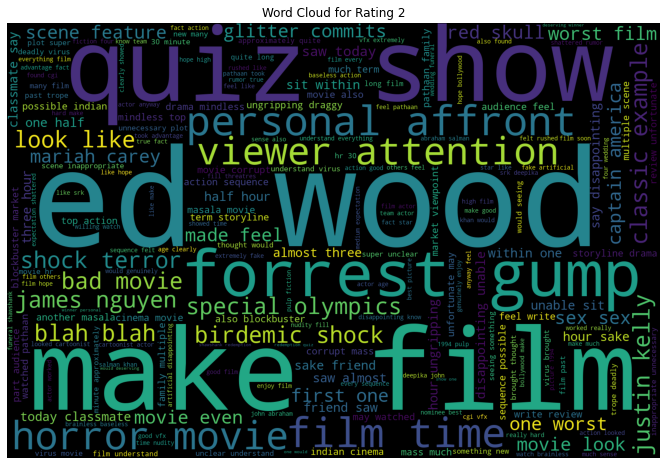

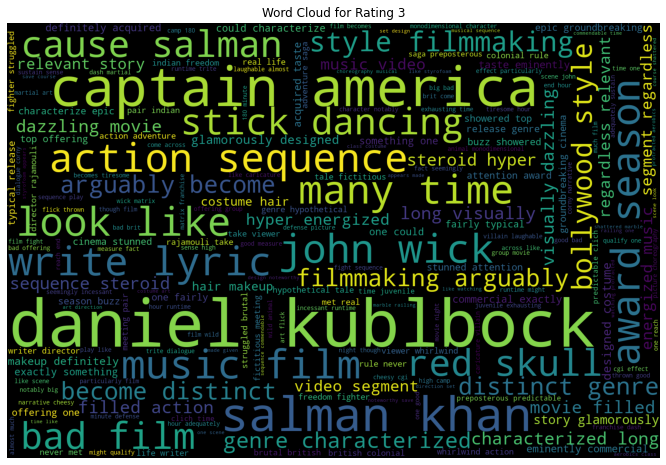

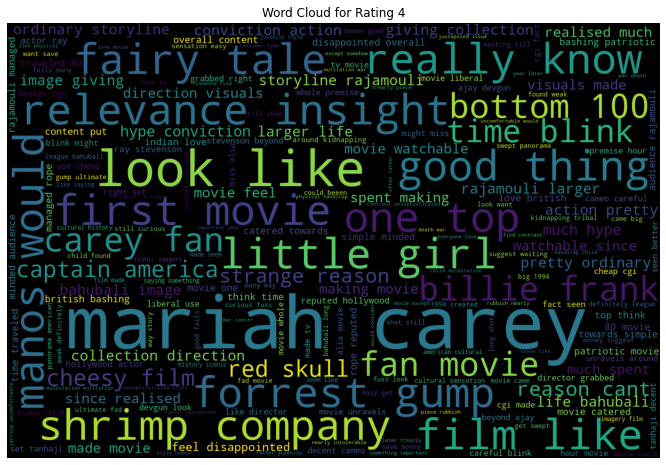

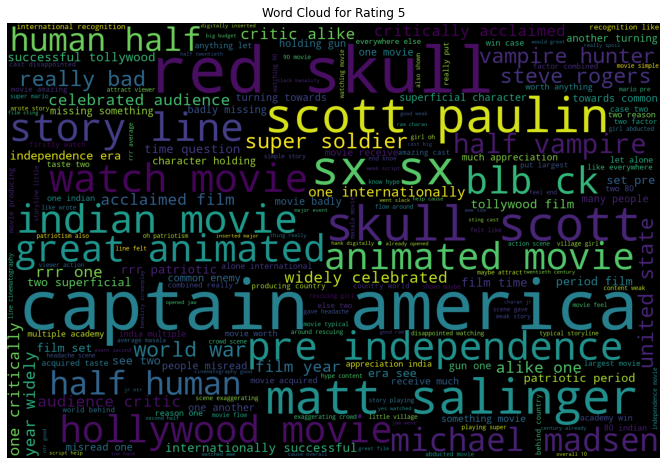

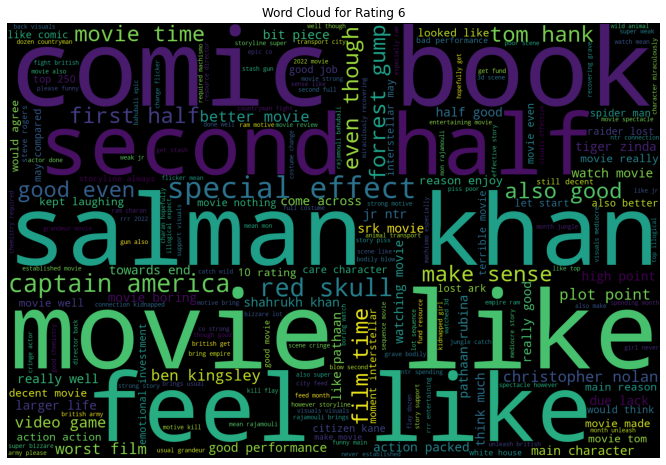

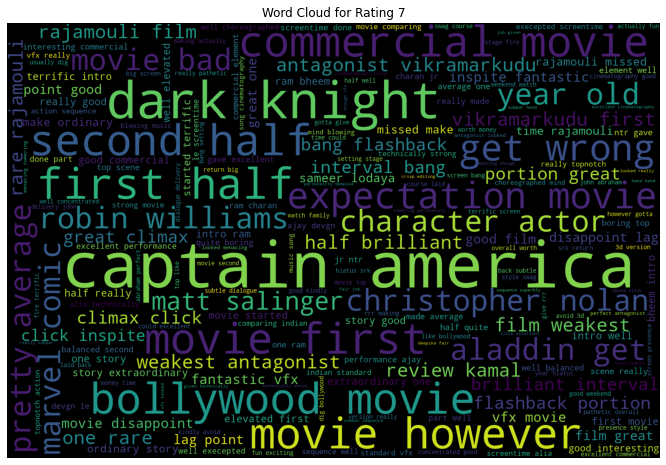

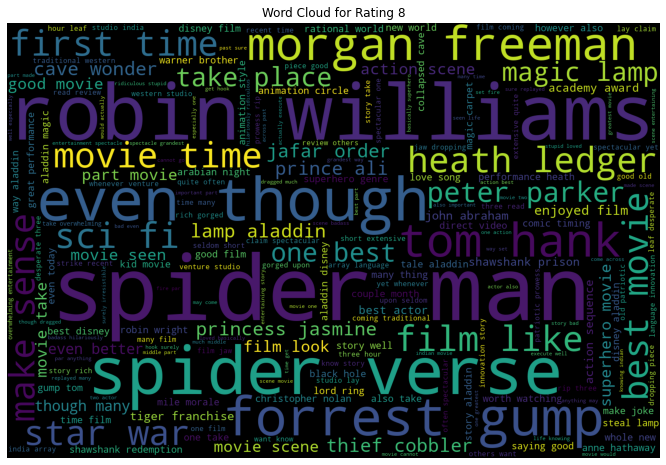

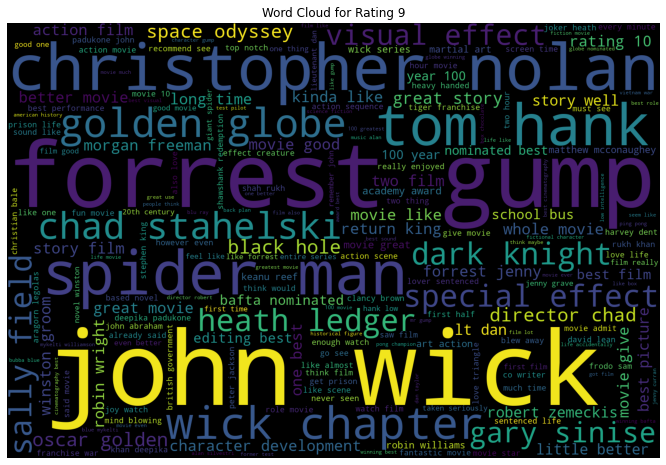

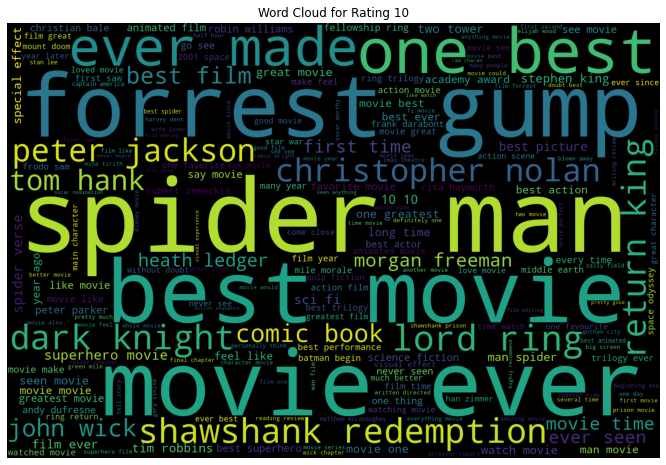

In [42]:
for rating in range(1,11):
    curr_lemmatized_tokens = list(reviews_df_copy[reviews_df_copy['Rating']==rating]['review_lemmas'])
    vectorizer = CountVectorizer(ngram_range=(2,2))
    bag_of_words = vectorizer.fit_transform(reviews_df_copy[reviews_df_copy['Rating']==rating]['review_lemmas'].apply(lambda x : ' '.join(x)))
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    words_dict = dict(words_freq)
    WC_height = 1000
    WC_width = 1500
    WC_max_words = 200
    wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width)
    wordCloud.generate_from_frequencies(words_dict)
    plt.figure(figsize=(20,8))
    plt.imshow(wordCloud)
    plt.title('Word Cloud for Rating '+str(rating))
    plt.axis("off")
    plt.show()

### 10. Visualize the distribution of sentiment scores: 
Using a histogram or a density plot to visualize the distribution of sentiment scores in the dataset. This will give an idea of how many reviews are positive, negative, or neutral.

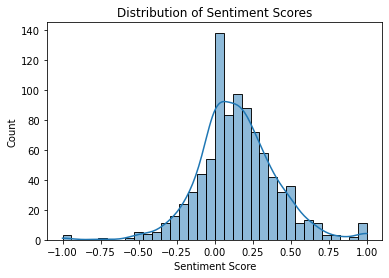

In [49]:
# Visualize the distribution of sentiment scores
sns.histplot(reviews_df_copy, x='sentiment_score', kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

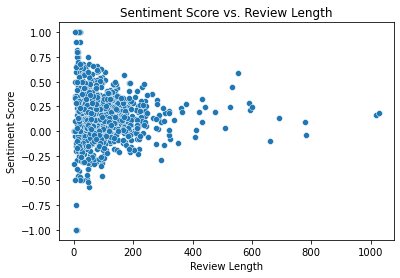

In [50]:
# Create a scatter plot of sentiment score vs. review length
sns.scatterplot(x='review_length', y='sentiment_score', data=reviews_df_copy)
plt.title('Sentiment Score vs. Review Length')
plt.xlabel('Review Length')
plt.ylabel('Sentiment Score')
plt.show()

Plotting the sentiment score against the review length or the to see if there are any patterns or trends.

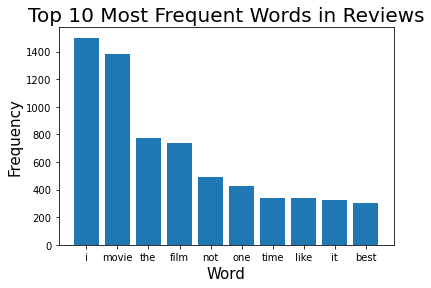

In [51]:
# Import necessary libraries
from collections import Counter

# Get the 10 most frequent words in the reviews
all_words = ' '.join(reviews_df_copy['lemmatized_review']).split()
word_counts = Counter(all_words)
top_10_words = dict(word_counts.most_common(10))

# Create a bar chart of the top 10 words
plt.bar(top_10_words.keys(), top_10_words.values())
plt.title('Top 10 Most Frequent Words in Reviews', fontsize=20)
plt.xlabel('Word', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

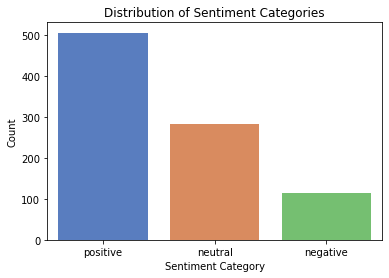

In [52]:
# Count the number of reviews in each sentiment category
sentiment_counts = reviews_df_copy['sentiment_category'].value_counts()

# Create a bar chart of the sentiment counts
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='muted')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

Creating a bar chart to show the distribution of sentiment categories (positive, negative, neutral) in your dataset. This can help to understand the overall sentiment of the reviews.

### 11. Word cloud of most frequent words in positive/negative reviews: 
A word cloud is a graphical representation of the most frequent words in a text, where the size of each word is proportional to its frequency. 

You could create separate word clouds for the positive and negative reviews in your dataset to see which words are most associated with each sentiment.

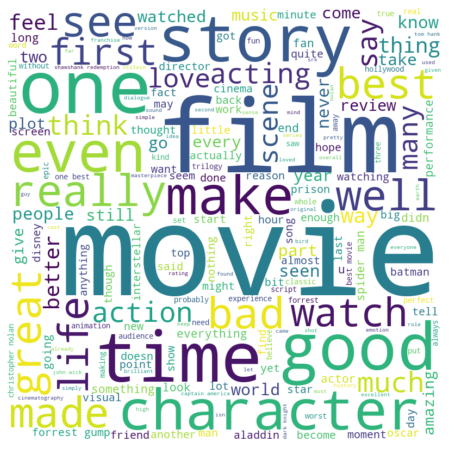

In [53]:
from wordcloud import WordCloud

# Combine all the lemmatized reviews into a single string
all_reviews = ' '.join(reviews_df_copy['lemmatized_review'].tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Creating a word cloud to visualize the most frequent words in the reviews. This can help to identify the key themes and topics that are associated with positive, negative, or neutral sentiment.

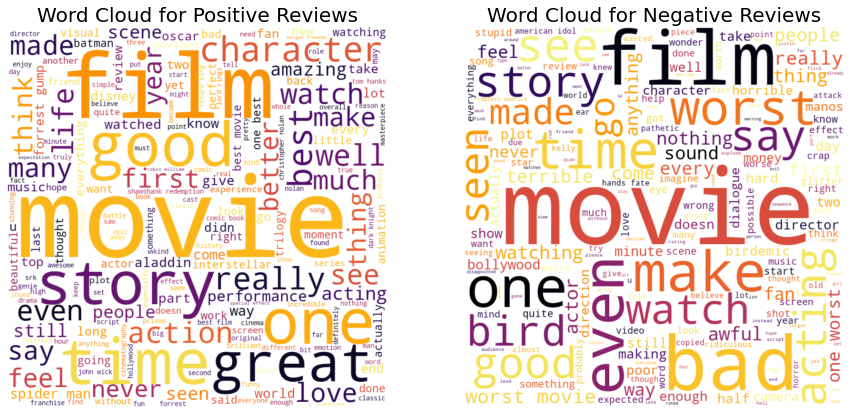

In [54]:
# Create separate dataframes for positive and negative reviews
positive_reviews = reviews_df_copy[reviews_df_copy['sentiment_category'] == 'positive']
negative_reviews = reviews_df_copy[reviews_df_copy['sentiment_category'] == 'negative']

# Generate word clouds for positive and negative reviews
positive_wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='inferno').generate(' '.join(positive_reviews['lemmatized_review']))
negative_wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='inferno').generate(' '.join(negative_reviews['lemmatized_review']))

# Visualize the word clouds
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
axs[0].imshow(positive_wordcloud, interpolation='bilinear')
axs[0].set_title('Word Cloud for Positive Reviews', fontsize=20)
axs[0].axis('off')
axs[1].imshow(negative_wordcloud, interpolation='bilinear')
axs[1].set_title('Word Cloud for Negative Reviews', fontsize=20)
axs[1].axis('off')
plt.show()